In [100]:
source('/home/akananth/Misc/Research-Jam-2023/effect_estimate_helper.R')

In [2]:
df = fread('data/final_samples/final_regression_data.tsv', sep='\t')
nrow(df)

[1] 16893013

# Get Effect Data - Function Words

In [3]:
m = 'function'
df$style <- df$num_markers
df$parent_style <- df$parent_num_markers

In [4]:
bins = c(0.5/24,0.75/24,1/24,1.5/24,2/24,
          3/24,4/24,6/24,8/24,12/24,1,2,5,10)
df$category = cut(df$wait_time, c(-1,bins), bins)
table(df$category, useNA='ifany')

plot_df <- get_lsm_estimates(df = df, marker = m, vname = 'time', seed = 24)




0.0208333333333333            0.03125 0.0416666666666667             0.0625 
            783476             853937             780385            1463884 
0.0833333333333333              0.125  0.166666666666667               0.25 
           1097035            1580416            1078780            1467427 
 0.333333333333333                0.5                  1                  2 
            940156            1169878            1552192            1127792 
                 5                 10 
           1107343            1890312 

In [5]:
bins = c(1:20,22,25,30,35,45,100)
df$category = cut(df$depth, c(-1,bins), bins)
table(df$category, useNA='ifany')

plot_df <- get_lsm_estimates(df = df, marker = m, vname = 'depth', seed = 25,
                             fmla = formula('style ~ parent_style + 
                                                num_tokens + parent_num_tokens + (1 | subreddit_re)'),
                             fmla_eff = formula('style ~ parent_style * category + 
                                                    num_tokens + parent_num_tokens + (1 | subreddit_re)'))




      1       2       3       4       5       6       7       8       9      10 
2257855 2267213 1804664 1653077 1593576 1244964 1070874  976116  923909  639877 
     11      12      13      14      15      16      17      18      19      20 
 458850  337020  255341  197552  156755  126112  103646   86269   72758   62022 
     22      25      30      35      45     100 
 100002  108735  118013   75932   90612  111269 

In [6]:
bins = sort(unique(df$score))
df$category = cut(df$score, c(-100,bins), bins)
table(df$category, useNA='ifany')

plot_df <- get_lsm_estimates(df = df, marker = m, vname = 'karma', seed = 26)




     -9      -8      -7      -6      -5      -4      -3      -2      -1       0 
  86809   15169   19509   25830   34639   45188   52721  107950  217500  819331 
      1       2       3       4       5       6       7       8       9      10 
8836985 4061672 1059173  336488  282387  185091  127799   93087   69523   54079 
     11      12 
  42759  319324 

In [7]:
bins = sort(unique(df$parent_score))
df$category = cut(df$parent_score, c(-100,bins), bins)
table(df$category, useNA='ifany')

plot_df <- get_lsm_estimates(df = df, marker = m, vname = 'parentkarma', seed = 27)




     -9      -8      -7      -6      -5      -4      -3      -2      -1       0 
 130329   20458   25654   32895   42870   54484   63103  120662  230269  808732 
      1       2       3       4       5       6       7       8       9      10 
8253297 3996028 1145089  391101  335197  225741  160377  119869   91350   72690 
     11      12 
  58248  514570 

In [8]:
bins = c(2:10,12,15,20,30,50,70,100)
df$category = cut(df$max_depth, c(-1,bins), bins)
table(df$category, useNA='ifany')

plot_df <- get_lsm_estimates(df = df, marker = m, vname = 'length', seed = 28)




      2       3       4       5       6       7       8       9      10      12 
 922654  463545  255141 1707314 1040259  675690  449219 2430311 1758247 2289408 
     15      20      30      50      70     100 
1804058 1323934  917644  510004  191013  154572 

Warning message:
“Model failed to converge with 1 negative eigenvalue: -5.9e+02”
Warning message:
“Model failed to converge with 1 negative eigenvalue: -7.8e+02”
Warning message:
“Model failed to converge with 1 negative eigenvalue: -5.8e+02”
Warning message:
“Model failed to converge with 1 negative eigenvalue: -7.1e+02”


In [9]:
bins <- c(0, 0.5, 1, 7, 30, 60, 90, 120, 150, 180, 
          365, 365*1.5, 365*2, 365*2.5, 365*3, 365*3.5, 365*4, 365*4.5, 365*5)
df$category <- cut(df$tenure, c(-1, bins), bins)
table(df$category, useNA='ifany')

plot_df <- get_lsm_estimates(df = df, marker = m, vname = 'tenure', seed = 29)




      0     0.5       1       7      30      60      90     120     150     180 
  97014 1120311  284825  728548  983461  898029  717811  624586  586707  535532 
    365   547.5     730   912.5    1095  1277.5    1460  1642.5    1825    <NA> 
2506524 1790971 1479964 1095295 1090160 1096338    2511   87672  372756  793998 

In [10]:
bins <- c(0, 1, 2, 3, 5, 10, 15, 20, 35, 50, 75,  
          100, 150, 180, 365, 365*2, 365*3)
df$category <- cut(df$subreddit_activity, c(-1, bins), bins)
table(df$category, useNA='ifany')

plot_df <- get_lsm_estimates(df = df, marker = m, vname = 'sractivity', seed = 30)




      0       1       2       3       5      10      15      20      35      50 
5071197  951829  617379  466793  700869 1137788  744705  548710 1089571  702848 
     75     100     150     180     365     730    1095 
 782008  539463  720098  302343 1014844  701797  800771 

In [ ]:
bins <- c(0, 5, 10, 15, 20, 35, 50, 75,  
          100, 150, 180, 365, 365*1.5, 365*2, 365*3, 5000)
df$category <- cut(df$total_activity, c(-1, bins), bins)
table(df$category, useNA='ifany')

plot_df <- get_lsm_estimates(df = df, marker = m, vname = 'totalactivity', seed = 31)




      0       5      10      15      20      35      50      75     100     150 
1673966 1353845  792841  617659  514053 1201231  915974 1174706  904880 1346979 
    180     365   547.5     730    1095    5000 
 618846 2308685 1109563  645141  668295 1046349 

In [ ]:
set.seed(seeds[23])

df$category <- df$max_depth

sc <- c()
b <- c()
c <- c()
for(d in 1:30){
    #message(paste(Sys.time(), d))
    sub = df %>% filter(depth==d)
    for(ind in 1:10){
        mod <- lmer(style ~ parent_style * category + num_tokens + parent_num_tokens + (1 | subreddit_re), 
                    sub %>% 
                        sample_n(min(nrow(sub),100000), replace=T) %>% 
                        group_by(subreddit) %>% 
                        mutate(n = n()) %>%
                        ungroup() %>%
                        mutate(subreddit_re = ifelse(n >= 30, subreddit, 'other'))
                   )
        b <- c(b, fixef(mod)['parent_style'])
        c <- c(c, fixef(mod)['parent_style:category'])
        sc <- c(sc, d)
    }
}

plot_df = data.frame(length=as.numeric(as.character(sc)), lsm=c/b, base=b, interact=c)
fwrite(plot_df, paste0(data_dir,'function_max_depth.csv'), row.names=F)

# Get Effect Data - Formality

In [ ]:
m = 'formality'
df$style <- df$formality
df$parent_style <- df$parent_formality

In [ ]:
bins = c(0.5/24,0.75/24,1/24,1.5/24,2/24,
          3/24,4/24,6/24,8/24,12/24,1,2,5,10)
df$category = cut(df$wait_time, c(-1,bins), bins)
table(df$category, useNA='ifany')

plot_df <- get_lsm_estimates(df = df, marker = m, vname = 'time', seed = 24)



In [ ]:
bins = c(1:20,22,25,30,35,45,100)
df$category = cut(df$depth, c(-1,bins), bins)
table(df$category, useNA='ifany')

plot_df <- get_lsm_estimates(df = df, marker = m, vname = 'depth', seed = 25,
                             fmla = formula('style ~ parent_style + 
                                                num_tokens + parent_num_tokens + (1 | subreddit_re)'),
                             fmla_eff = formula('style ~ parent_style * category + 
                                                    num_tokens + parent_num_tokens + (1 | subreddit_re)'))



In [ ]:
bins = sort(unique(df$score))
df$category = cut(df$score, c(-100,bins), bins)
table(df$category, useNA='ifany')

plot_df <- get_lsm_estimates(df = df, marker = m, vname = 'karma', seed = 26)



In [ ]:
bins = sort(unique(df$parent_score))
df$category = cut(df$parent_score, c(-100,bins), bins)
table(df$category, useNA='ifany')

plot_df <- get_lsm_estimates(df = df, marker = m, vname = 'parentkarma', seed = 27)



In [ ]:
bins = c(2:10,12,15,20,30,50,70,100)
df$category = cut(df$max_depth, c(-1,bins), bins)
table(df$category, useNA='ifany')

plot_df <- get_lsm_estimates(df = df, marker = m, vname = 'length', seed = 28)



In [ ]:
bins <- c(0, 0.5, 1, 7, 30, 60, 90, 120, 150, 180, 
          365, 365*1.5, 365*2, 365*2.5, 365*3, 365*3.5, 365*4, 365*4.5, 365*5)
df$category <- cut(df$tenure, c(-1, bins), bins)
table(df$category, useNA='ifany')

plot_df <- get_lsm_estimates(df = df, marker = m, vname = 'tenure', seed = 29)



In [ ]:
bins <- c(0, 1, 2, 3, 5, 10, 15, 20, 35, 50, 75,  
          100, 150, 180, 365, 365*2, 365*3)
df$category <- cut(df$subreddit_activity, c(-1, bins), bins)
table(df$category, useNA='ifany')

plot_df <- get_lsm_estimates(df = df, marker = m, vname = 'sractivity', seed = 30)



In [ ]:
bins <- c(0, 5, 10, 15, 20, 35, 50, 75,  
          100, 150, 180, 365, 365*1.5, 365*2, 365*3, 5000)
df$category <- cut(df$total_activity, c(-1, bins), bins)
table(df$category, useNA='ifany')

form_df <- get_lsm_estimates(df = df, marker = m, vname = 'totalactivity', seed = 31)



In [ ]:
set.seed(seeds[32])

df$category <- df$max_depth

sc <- c()
b <- c()
c <- c()
for(d in 1:30){
    #message(paste(Sys.time(), d))
    sub = df %>% filter(depth==d)
    for(ind in 1:10){
        mod <- lmer(style ~ parent_style * category + num_tokens + parent_num_tokens + (1 | subreddit_re), 
                    sub %>% 
                        sample_n(min(nrow(sub),100000), replace=T) %>% 
                        group_by(subreddit) %>% 
                        mutate(n = n()) %>%
                        ungroup() %>%
                        mutate(subreddit_re = ifelse(n >= 30, subreddit, 'other'))
                   )
        b <- c(b, fixef(mod)['parent_style'])
        c <- c(c, fixef(mod)['parent_style:category'])
        sc <- c(sc, d)
    }
}

plot_df = data.frame(length=as.numeric(sc), lsm=c/b, base=b, interact=c)
fwrite(plot_df, paste0(data_dir,'formality_max_depth.csv'), row.names=F)

# Figures for Paper

### Figure 2: Time to Comment

Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


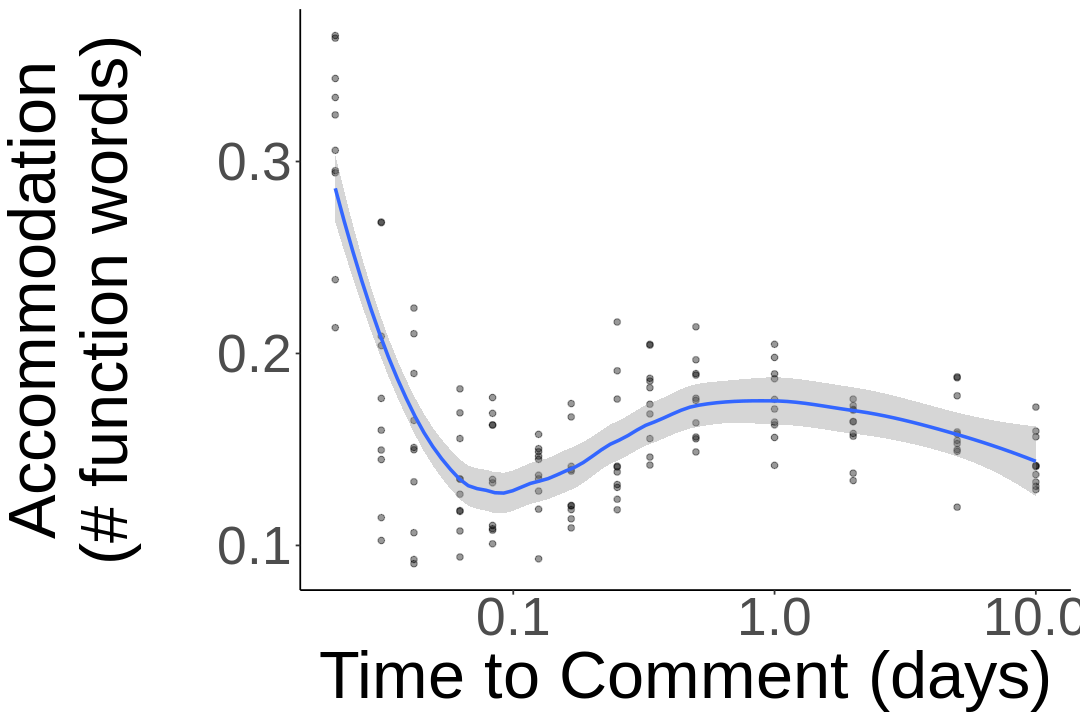

In [59]:
make_lsm_effect_plot(marker='function', vname='time', x_label='Time to Comment (days)',
                     sp=0.7, extra_args=scale_x_continuous(trans = 'log10'))

Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


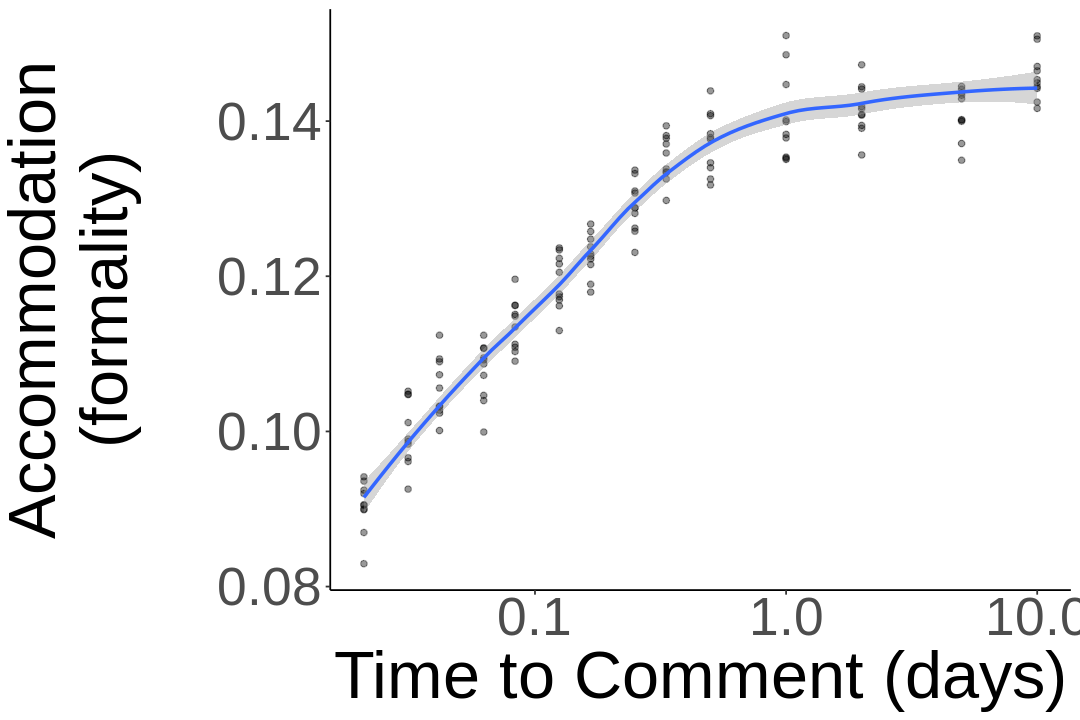

In [60]:
make_lsm_effect_plot(marker='formality', vname='time', x_label='Time to Comment (days)',
                     sp=0.7, extra_args=scale_x_continuous(trans = 'log10'))

### Figure 5: Depth

Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
Warning message:
“Removed 10 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 10 rows containing missing values (`geom_point()`).”
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
Warning message:
“Removed 10 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 10 rows containing missing values (`geom_point()`).”


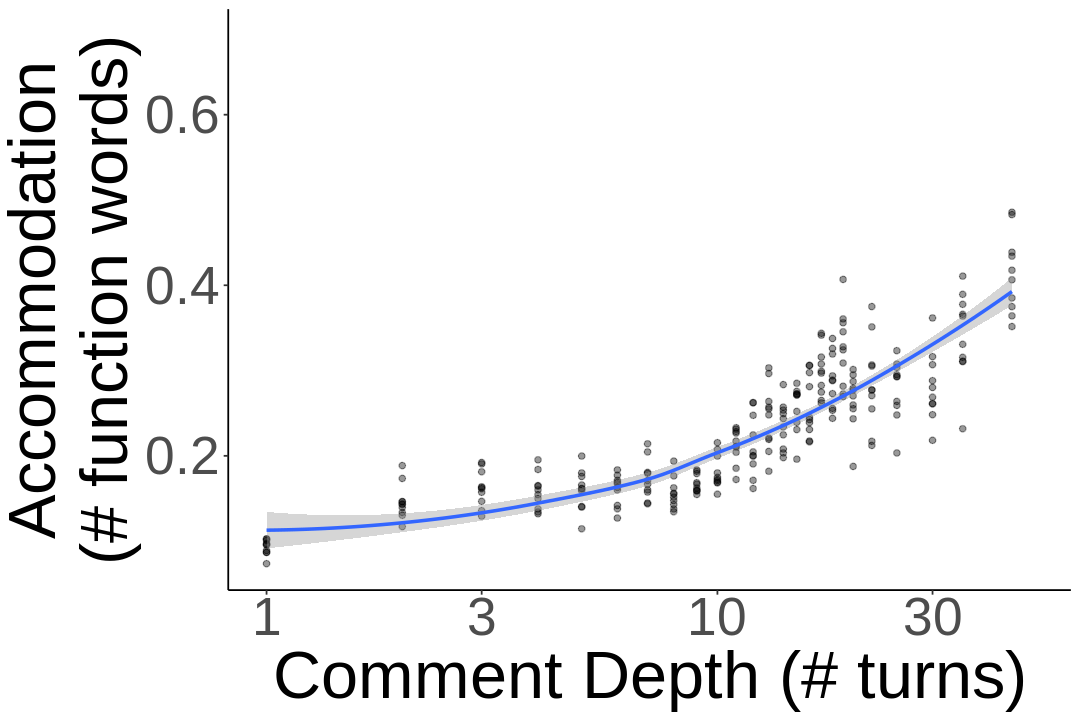

In [101]:
make_lsm_effect_plot(marker='function', vname='depth', x_label='Comment Depth (# turns)',
                     extra_args=scale_x_continuous(trans = 'log10', limits=c(1,50)))

Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
Warning message:
“Removed 10 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 10 rows containing missing values (`geom_point()`).”
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
Warning message:
“Removed 10 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 10 rows containing missing values (`geom_point()`).”


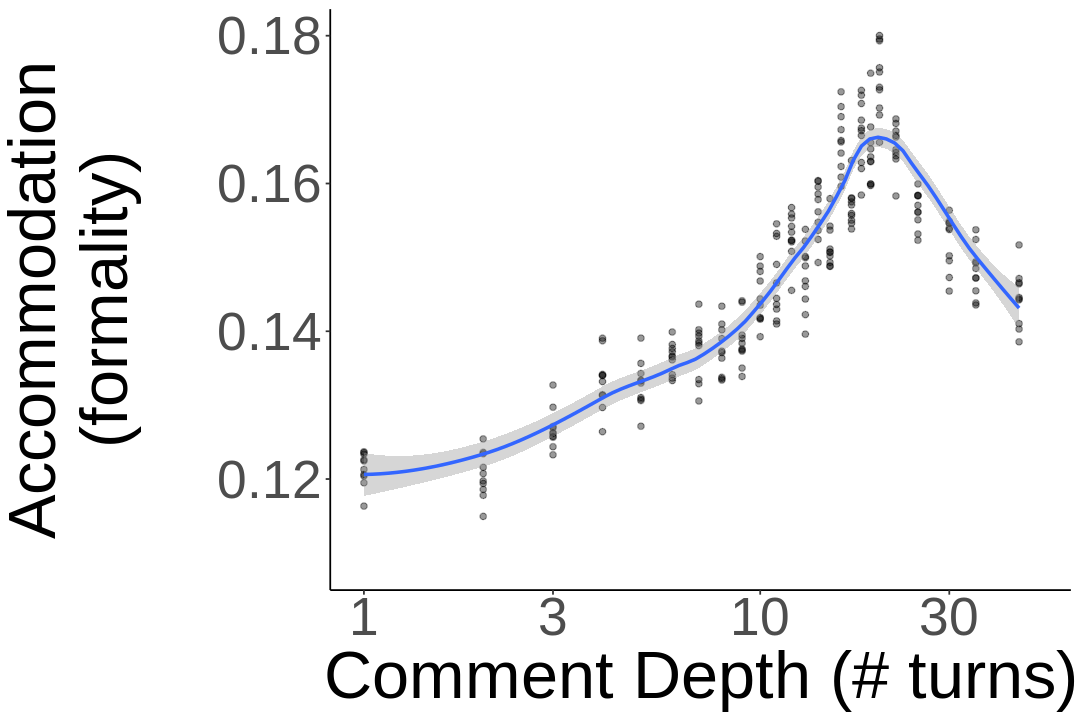

In [68]:
make_lsm_effect_plot(marker='formality', vname='depth', x_label='Comment Depth (# turns)', sp=0.5,
                     extra_args=scale_x_continuous(trans = 'log10', limits=c(1,50)))

### Figure 5: Karma

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
Warning message:
“Removed 5 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 5 rows containing missing values (`geom_point()`).”
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
Warning message:
“Removed 5 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 5 rows containing missing values (`geom_point()`).”


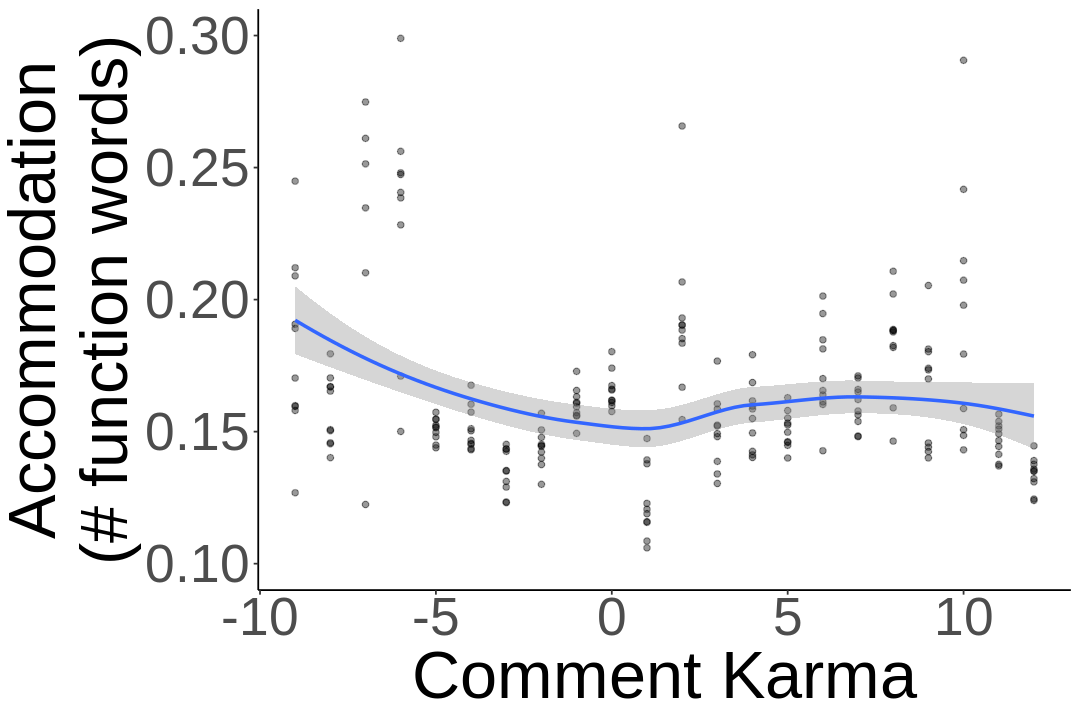

In [99]:
make_lsm_effect_plot(marker='function', vname='karma', x_label='Comment Karma', ylim=c(0.1,0.3))

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


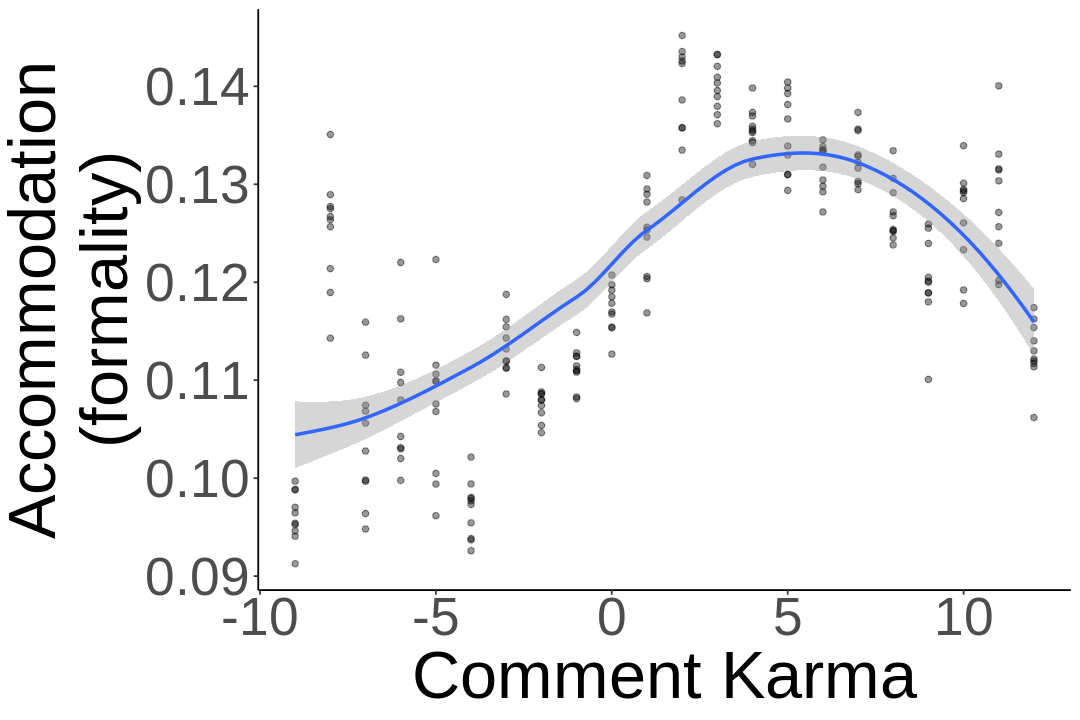

In [102]:
make_lsm_effect_plot(marker='formality', vname='karma', x_label='Comment Karma')

### Figure 5: Parent Karma

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


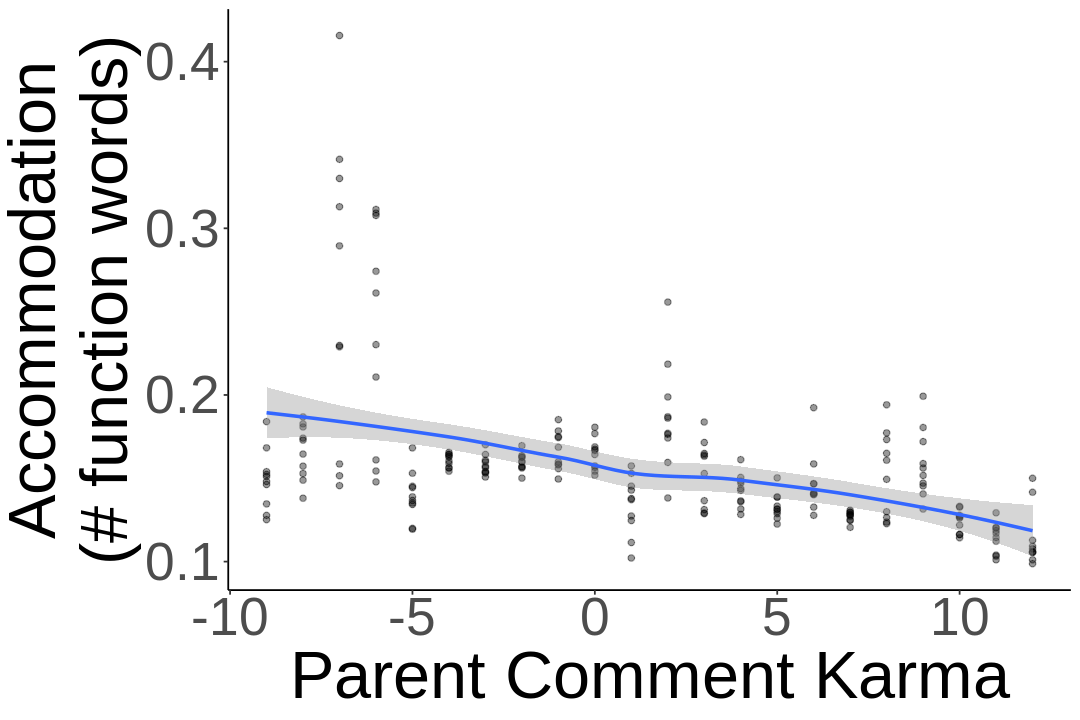

In [103]:
make_lsm_effect_plot(marker='function', vname='parentkarma', x_label='Parent Comment Karma')

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


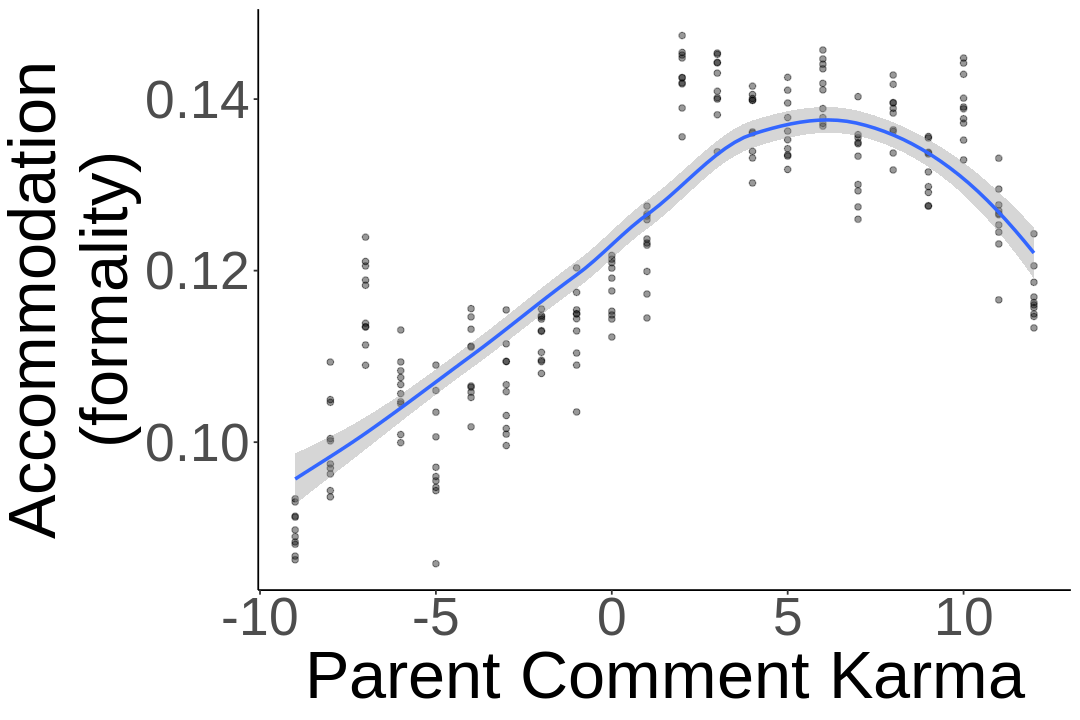

In [104]:
make_lsm_effect_plot(marker='formality', vname='parentkarma', x_label='Parent Comment Karma')

### Figure 6: Length

Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
Warning message:
“Removed 10 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 10 rows containing missing values (`geom_point()`).”
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
Warning message:
“Removed 10 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 10 rows containing missing values (`geom_point()`).”


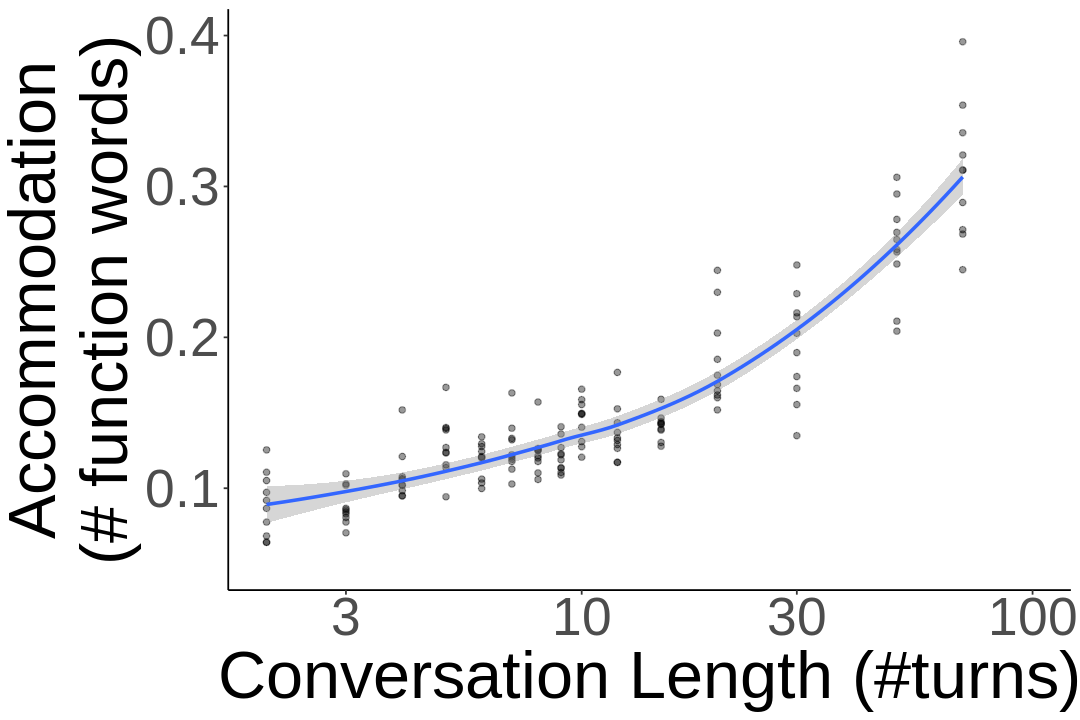

In [95]:
make_lsm_effect_plot(marker='function', vname='length', x_label='Conversation Length (#turns)',
                     ylim = c(0.05, 0.4),
                     extra_args=scale_x_continuous(trans = 'log10'))

Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


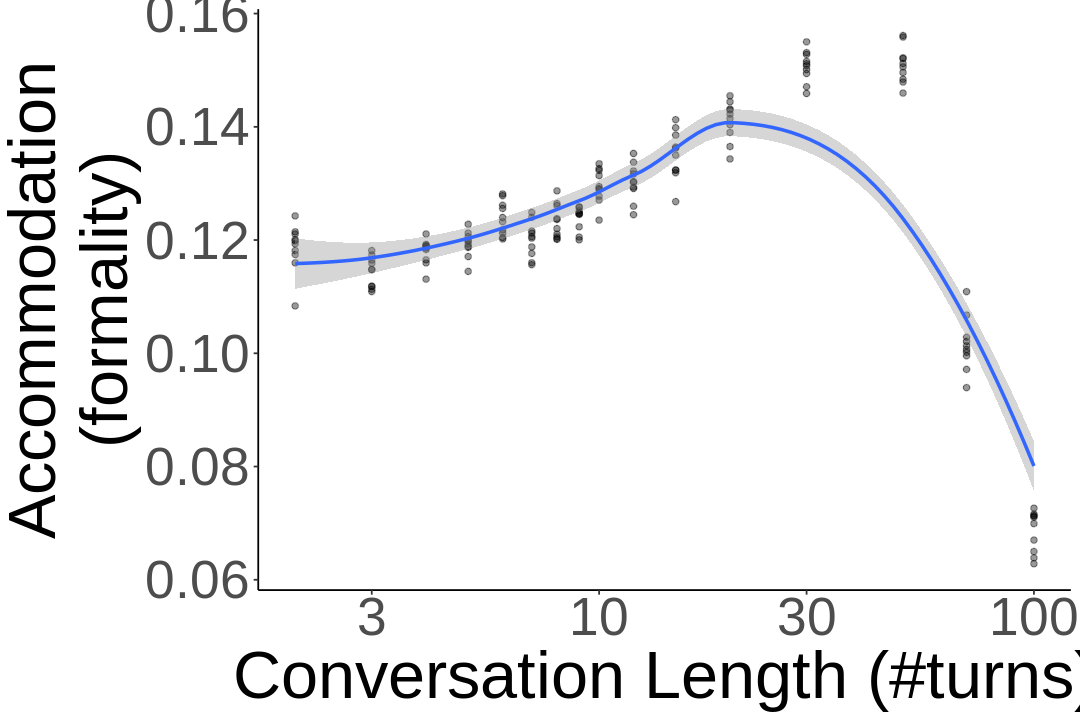

In [96]:
make_lsm_effect_plot(marker='formality', vname='length', x_label='Conversation Length (#turns)',
                     extra_args=scale_x_continuous(trans = 'log10'))

### Figure 6: Length x Depth


`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


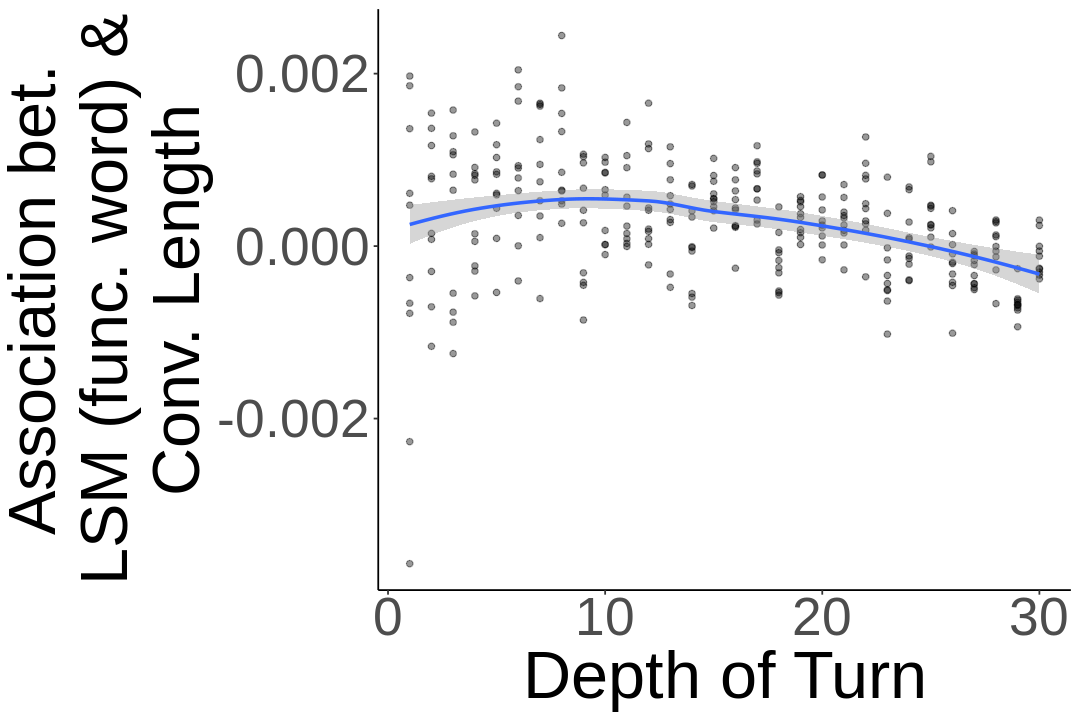

In [75]:
make_lsm_effect_plot(marker='function', vname='max_depth', x_label='Depth of Turn', 
                     extra_args = labs(y = 'Association bet.\nLSM (func. word) &\nConv. Length'))

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


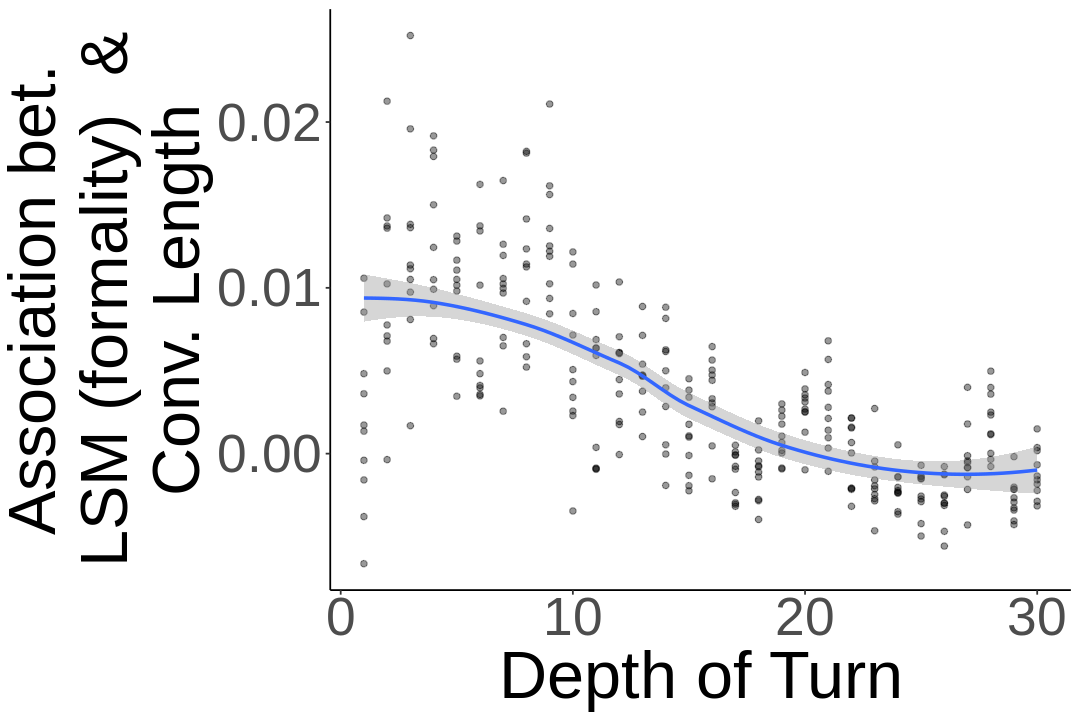

In [76]:
make_lsm_effect_plot(marker='formality', vname='max_depth', x_label='Depth of Turn', 
                     extra_args = labs(y = 'Association bet.\nLSM (formality)  &\nConv. Length'))

### Figure 7: Tenure

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


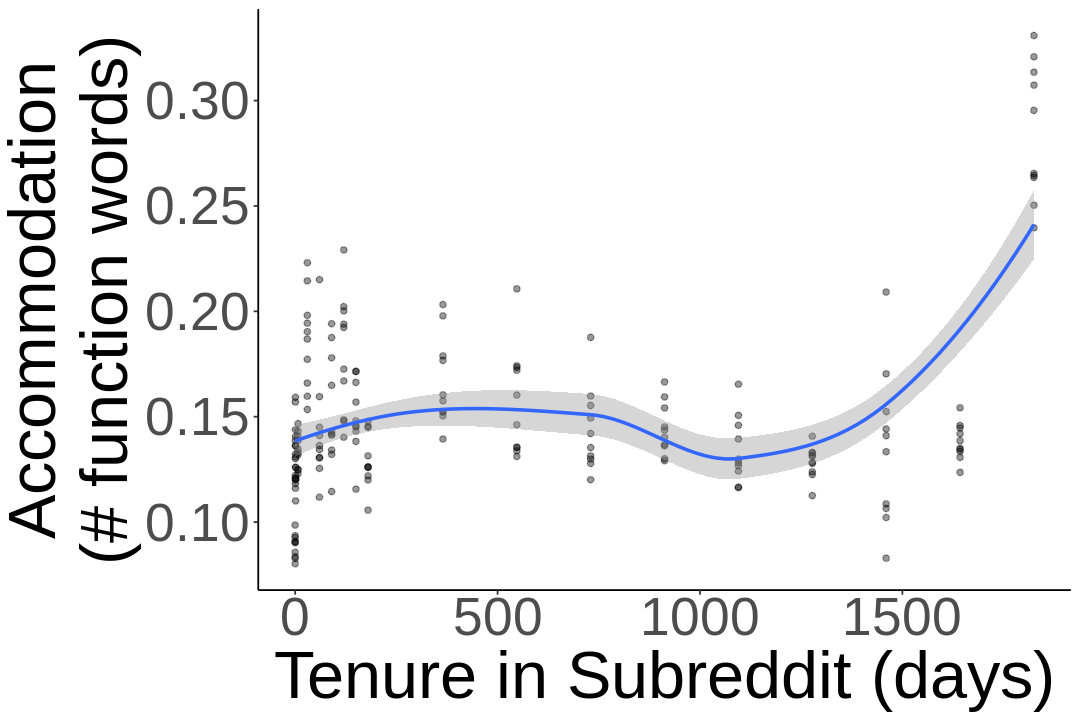

In [105]:
make_lsm_effect_plot(marker='function', vname='tenure', x_label='Tenure in Subreddit (days)')

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


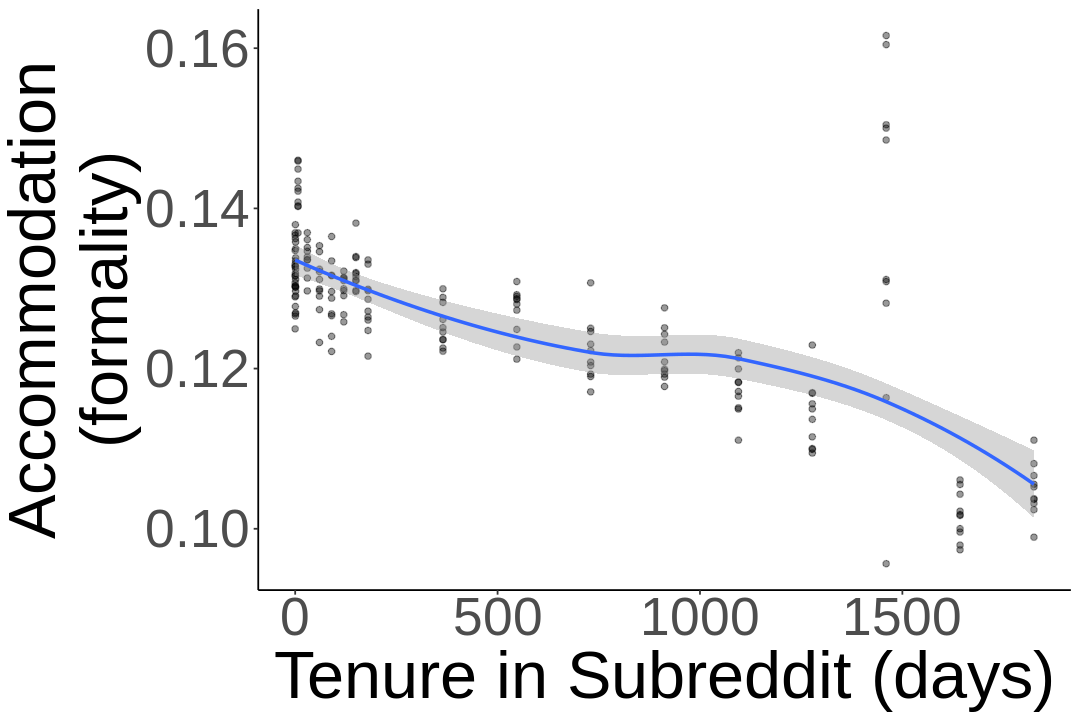

In [106]:
make_lsm_effect_plot(marker='formality', vname='tenure', x_label='Tenure in Subreddit (days)')

### Figure 7: Subreddit Activity

Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Transformation introduced infinite values in continuous x-axis”
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
Warning message:
“Removed 10 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Transformation introduced infinite values in continuous x-axis”
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
Warning message:
“Removed 10 rows containing non-finite values (`stat_smooth()`).”


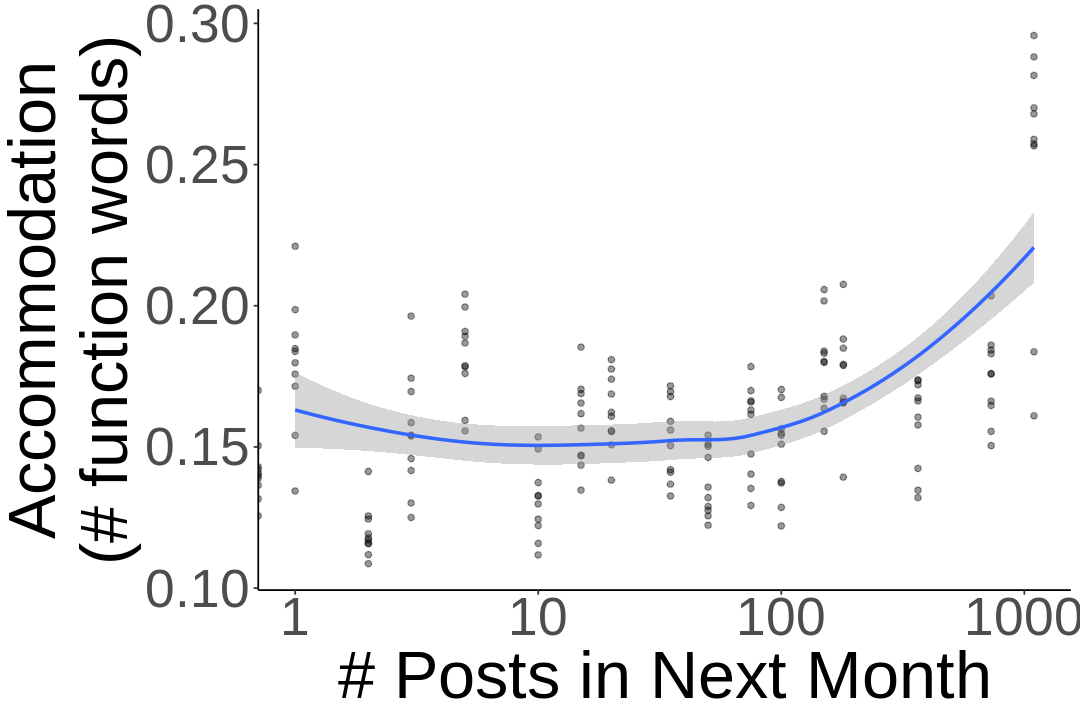

In [111]:
make_lsm_effect_plot(marker='function', vname='sractivity', x_label='# Posts in Next Month',
                     extra_args = scale_x_continuous(trans='log10'))

Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Transformation introduced infinite values in continuous x-axis”
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
Warning message:
“Removed 10 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Transformation introduced infinite values in continuous x-axis”
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
Warning message:
“Removed 10 rows containing non-finite values (`stat_smooth()`).”


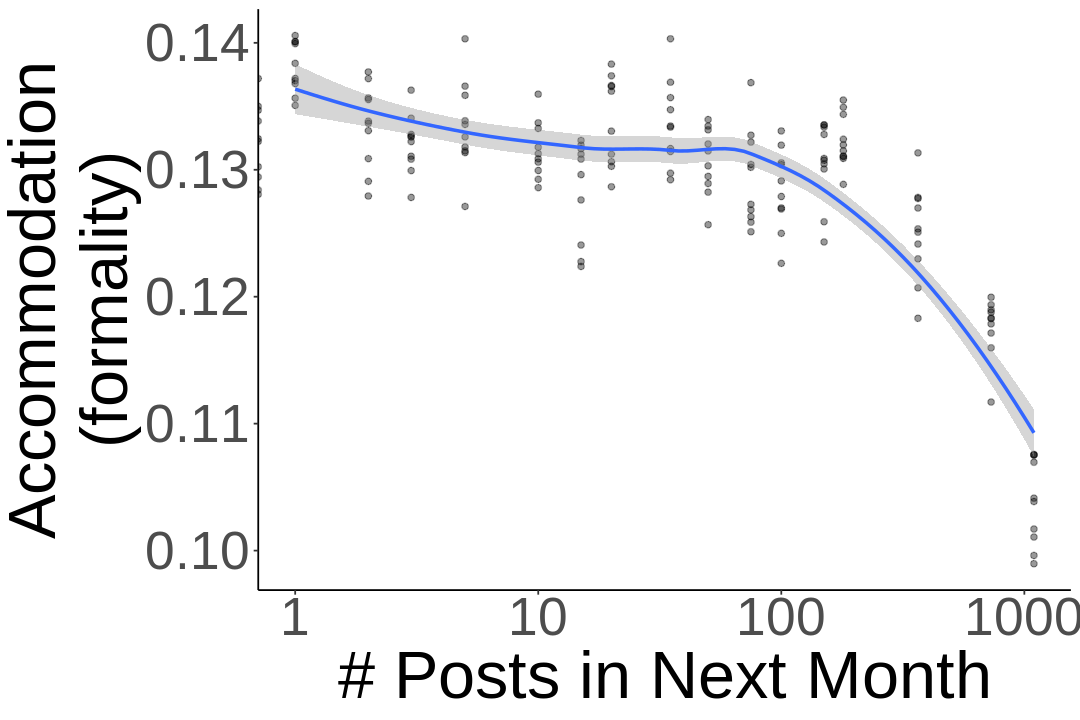

In [112]:
make_lsm_effect_plot(marker='formality', vname='sractivity', x_label='# Posts in Next Month',
                     extra_args = scale_x_continuous(trans='log10'))

### Figure 7: Total Activity

Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Transformation introduced infinite values in continuous x-axis”
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
Warning message:
“Removed 10 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Transformation introduced infinite values in continuous x-axis”
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
Warning message:
“Removed 10 rows containing non-finite values (`stat_smooth()`).”


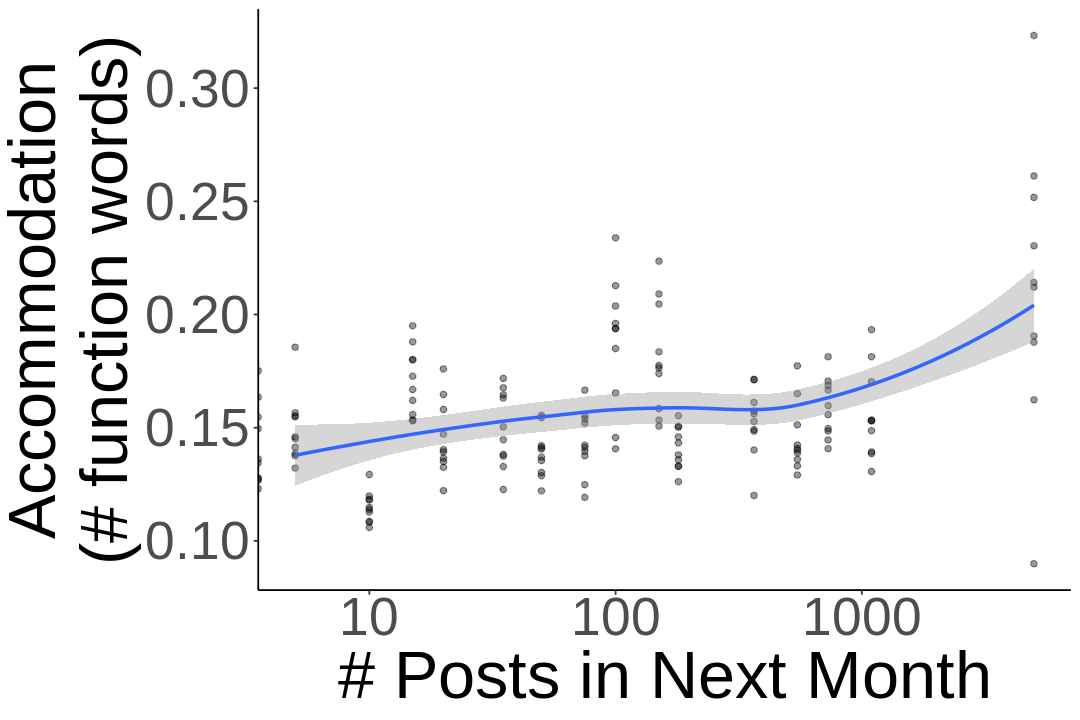

In [113]:
make_lsm_effect_plot(marker='function', vname='totalactivity', x_label='# Posts in Next Month',
                     extra_args = scale_x_continuous(trans='log10'))

Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Transformation introduced infinite values in continuous x-axis”
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
Warning message:
“Removed 10 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Transformation introduced infinite values in continuous x-axis”
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
Warning message:
“Removed 10 rows containing non-finite values (`stat_smooth()`).”


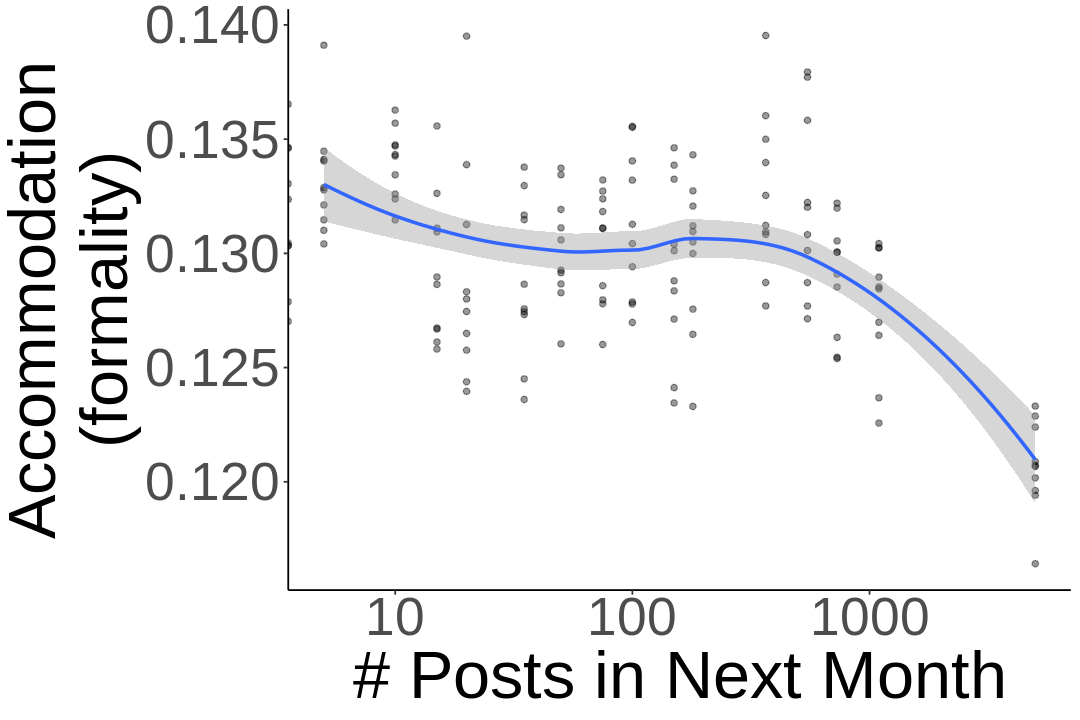

In [114]:
make_lsm_effect_plot(marker='formality', vname='totalactivity', x_label='# Posts in Next Month',
                     extra_args = scale_x_continuous(trans='log10'))

# Test Effects

### Figure 2: Time to Comment

In [ ]:
summary(readRDS('results/reg_models/function_time.RDS'))

In [ ]:
summary(readRDS('results/reg_models/formality_time.RDS'))

### Figure 5: Depth

In [ ]:
summary(readRDS('results/reg_models/function_depth.RDS'))

In [ ]:
summary(readRDS('results/reg_models/formality_depth.RDS'))

### Figure 5: Karma

In [ ]:
summary(readRDS('results/reg_models/function_karma.RDS'))

In [ ]:
summary(readRDS('results/reg_models/formality_karma.RDS'))

### Figure 5: Parent Karma

In [ ]:
summary(readRDS('results/reg_models/function_parentkarma.RDS'))

In [ ]:
summary(readRDS('results/reg_models/formality_parentkarma.RDS'))

### Figure 6: Length

In [ ]:
summary(readRDS('results/reg_models/function_length.RDS'))

In [ ]:
summary(readRDS('results/reg_models/formality_length.RDS'))

### Figure 6: Length x Depth


In [115]:
reg_df <- fread(paste0(data_dir,'function_max_depth.csv'))
summary(lm(lsm ~ length, reg_df))


Call:
lm(formula = lsm ~ length, data = reg_df)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0043261 -0.0003516  0.0000523  0.0003870  0.0019735 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  6.681e-04  7.841e-05   8.520 8.05e-16 ***
length      -2.496e-05  4.417e-06  -5.652 3.70e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.0006621 on 298 degrees of freedom
Multiple R-squared:  0.09683,	Adjusted R-squared:  0.0938 
F-statistic: 31.95 on 1 and 298 DF,  p-value: 3.703e-08


In [116]:
reg_df <- fread(paste0(data_dir,'formality_max_depth.csv'))
summary(lm(lsm ~ length, reg_df))


Call:
lm(formula = lsm ~ length, data = reg_df)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0170927 -0.0026385 -0.0000506  0.0021244  0.0157080 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.093e-02  5.047e-04   21.66   <2e-16 ***
length      -4.727e-04  2.843e-05  -16.63   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.004262 on 298 degrees of freedom
Multiple R-squared:  0.4813,	Adjusted R-squared:  0.4796 
F-statistic: 276.5 on 1 and 298 DF,  p-value: < 2.2e-16


### Figure 7: Tenure

In [ ]:
summary(readRDS('results/reg_models/function_tenure.RDS'))

In [ ]:
summary(readRDS('results/reg_models/formality_tenure.RDS'))

### Figure 7: Subreddit Activity

In [ ]:
summary(readRDS('results/reg_models/function_sractivity.RDS'))

In [ ]:
summary(readRDS('results/reg_models/formality_sractivity.RDS'))

### Figure 7: Total Activity

In [ ]:
summary(readRDS('results/reg_models/function_totalactivity.RDS'))

In [ ]:
summary(readRDS('results/reg_models/formality_totalactivity.RDS'))